In [3]:
import numpy as np
from sympy import Eq, solve, diff, symbols, Symbol, cos, sin, pi, integrate
import matplotlib.pyplot as plt

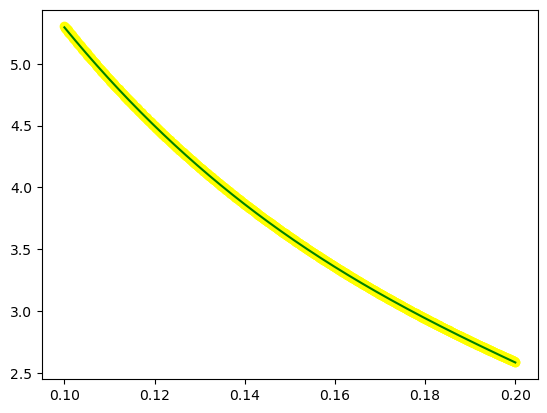

In [6]:
#1.
n = 3
a = 0.1
b = 0.2

def f(x):
    return np.log(x) ** 2

x_axis = np.linspace(a, b, 1000)
y_vals = f(x_axis)

a,b,c,d,x = symbols('a,b,c,d,x')

def poly(a,b,c,d, x):
    return a * x**3 + b * x**2 + c * x + d

def summary_matrix(x, size, pow_x):
    sum = 0
    for i in range(size):
        sum += x[i]**pow_x
    return sum

def create_matrix(x, size, n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(summary_matrix(x, size, i + j))
        matrix.append(row)
    return matrix

def summary_col(x, y, size, pow_x):
    sum = 0
    for i in range(size):
        sum += (y[i] * x[i]**pow_x)
    return sum

def create_coll(x, y, size, n):
    coll = []
    for i in range(n):
        coll.append(summary_col(x, y, size, i))
    return coll

def least_squares(x, y, n):
    size = x.size
    matrix = create_matrix(x, size, n)
    coll = create_coll(x, y, size, n)
    res = np.linalg.solve(matrix, coll)
    return res

sol = least_squares(x_axis, y_vals, 4)

plt.scatter(x_axis, y_vals, color = 'yellow')
plt.plot(x_axis, poly(sol[3], sol[2], sol[1], sol[0], x_axis), color = 'green')
plt.show()

In [8]:
#2.
n,x = symbols('n,x')

a = pi / 4
b = pi / 2

def f(x):
    return cos(x) * sin(2 * x)


derivateI = diff(f(x), x)
derivateII = diff(derivateI, x)
derivateIII = diff(derivateII, x)
derivateIV = diff(derivateIII, x)

derivateIV.subs(x, a)


41*sqrt(2)/2

In [10]:
R_Simpson = - (b - a)**5 / (2880 * n**4) * derivateIV.subs(x, a)
R_Simpson

-41*sqrt(2)*pi**5/(5898240*n**4)

In [12]:
n = int(np.ceil(np.sqrt(np.sqrt(10**5 * np.pi**5 * 41 * np.sqrt(2) / 5898240))))
print("n = ", n)

n =  5


In [18]:
approximate_value = 0
x_mash = np.linspace(np.pi / 4, np.pi / 2, n + 1)


def func(x):
    return np.cos(x) * np.sin(2 * x)

for i in range(1, x_mash.size):
    approximate_value += (func(x_mash[i - 1]) + 4 * func((x_mash[i] + x_mash[i-1]) / 2) + func(x_mash[i]))

approximate_value *= (np.pi / 2 - np.pi / 4)/ (6 * n)

print("Simpson value = ", approximate_value)

Simpson value =  0.23570030384505322


In [20]:
x = Symbol('x')
real_val = integrate(f(x), (x, np.pi / 4, np.pi / 2))
print("Real value = ", real_val)

Real value =  0.235702260395516


In [5]:
a = -np.pi
b = 0

def f(x):
    return np.cos(x) ** 3 + 141

n = 3
A1, A2, A3, x1, x2, x3, x = symbols('A1, A2, A3, x1, x2, x3, x')


In [ ]:

equations = [
    Eq(A1 + A2 + A3, integrate(1, (x, a, b))), 
    Eq(A1 * x1 + A2 * x2 + A3 * x3, integrate(x, (x, a, b))), 
    Eq(A1 * (x1 ** 2) + A2 * (x2 ** 2) + A3 * (x3 ** 2), integrate(x ** 2, (x, a, b))), 
    Eq(A1 * (x1 ** 3) + A2 * (x2 ** 3) + A3 * (x3 ** 3), integrate(x ** 3, (x, a, b))), 
    Eq(A1 * (x1 ** 4) + A2 * (x2 ** 4) + A3 * (x3 ** 4), integrate(x ** 4, (x, a, b))), 
    Eq(A1 * (x1 ** 5) + A2 * (x2 ** 5) + A3 * (x3 ** 5), integrate(x ** 5, (x, a, b)))
]

sol = solve(equations)


In [ ]:
coef = sol[0]

formule = coef[A1] * f(float(coef[x1])) + coef[A2] * f(float(coef[x2])) + coef[A3] * f(float(coef[x3]))
print(formule)